# Departamentos en Venta en CABA 2020

Para este análisis descriptivo se utilizara el siguiente dataset: https://data.buenosaires.gob.ar/dataset/departamentos-venta<br>
El mismo posee información de los departamentos en venta en Ciudad de Buenos Aires en el año 2020

### **Objetivos**:
- Realizar una **limpieza a los datos.**
- **Explorar** cuáles son las características de los departamentos en venta y sus valores.
- **Visualizar las relaciones** entre las distintas variables del dataset

### **Variables del Dataset:**
<br>
 Dirección: Dirección de la propiedad<br>
 PropiedadS:(No se encontró información acerca del valor que corresponde esta variable) <br>
 Dolares: Valor en dólares de la propiedad<br>
 Pesos: Valor en pesos de la propiedad<br>
 DolaresM2: Valor en dolares del metro cuadrado<br>
 PesosM2: Valor en pesos del metro cuadrado<br>
 Ambientes: Cantidad de ambientes<br>
 Cotizacion: (No se encontró información acerca del valor que corresponde esta variable)<br>
 Trimestre: Trimestre en el que la propiedad se puso a la venta<br>
 Barrio: Barrio al que pertenece la propiedad<br>
 Comunas: Comuna a la que pertenece la propiedad.
<br>

  Nota: Se decide no utilizar las columnas PropiedadS y Cotización ya que no se encontró información sobre las mismas.




In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("departamentos-en-venta-2020-intervalos.csv")
data.head()

,Barrio,Comunas,Ambientes,Trimestre,Pesos,Dolares,PesosM2,DolaresM2,Rango_Pesos,Rango_Dolares,Rango_PesosM2,Rango_DolaresM2
0,ALMAGRO,5,1,SEGUNDO,3513600,54900,206682,3229,<5M,50K - 75K,200K - 500K,"2,5K - 5K"
1,ALMAGRO,5,1,SEGUNDO,3392000,53000,188444,2944,<5M,50K - 75K,150K - 200K,"2,5K - 5K"
2,ALMAGRO,5,1,SEGUNDO,2880000,45000,160000,2500,<5M,<50K,150K - 200K,"2,5K - 5K"
3,ALMAGRO,5,1,SEGUNDO,2624000,41000,145778,2278,<5M,<50K,100K - 150K,"1K - 2,5K"
4,ALMAGRO,5,1,SEGUNDO,3769600,58900,209422,3272,<5M,50K - 75K,200K - 500K,"2,5K - 5K"


## Barrios con *mayor* y *menor* valor promedio del m2 en dólares 

In [6]:
mayor_promedio_dM2 = pd.DataFrame(data['DolaresM2'].groupby(data['Barrio'])
                                         .mean().rename('Promedio DolaresM2')
                                         .sort_values(ascending = False).reset_index()).head(5)
mayor_promedio_dM2

,Barrio,Promedio DolaresM2
0,PUERTO MADERO,6536.058116
1,NUÑEZ,3680.729761
2,PALERMO,3652.790878
3,BELGRANO,3569.498612
4,RECOLETA,3304.058697


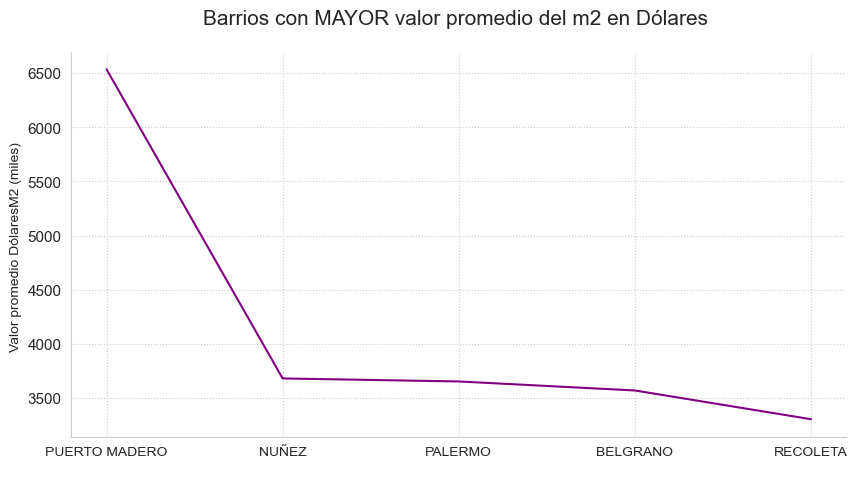

In [67]:
plt.figure(figsize=(10,5))
plt.title('Barrios con MAYOR valor promedio del m2 en Dólares ', y=1.05, fontdict={'size':15})
plt.xticks(fontsize=10)
plt.yticks(fontsize=11)
plt.ylabel('Valor promedio DólaresM2 (miles) ')
plt.xlabel(' ')

sns.lineplot(x = mayor_promedio_dM2['Barrio'],
             y = mayor_promedio_dM2['Promedio DolaresM2'],
             color = 'purple',
             data = mayor_promedio_dM2)
sns.despine()
sns.set_style("whitegrid", {'grid.linestyle': ':'})

plt.show()


In [10]:
menor_promedio_dM2 = pd.DataFrame(data['DolaresM2'].groupby(data['Barrio'])
                                         .mean().rename('Promedio DolaresM2')
                                         .sort_values(ascending = False).reset_index()).tail(5)
menor_promedio_dM2

,Barrio,Promedio DolaresM2
46,NUEVA POMPEYA,1766.195067
47,BOCA,1747.663804
48,BARRACAS OESTE,1546.750000
49,VILLA LUGANO,1487.301749
50,VILLA SOLDATI,892.540984


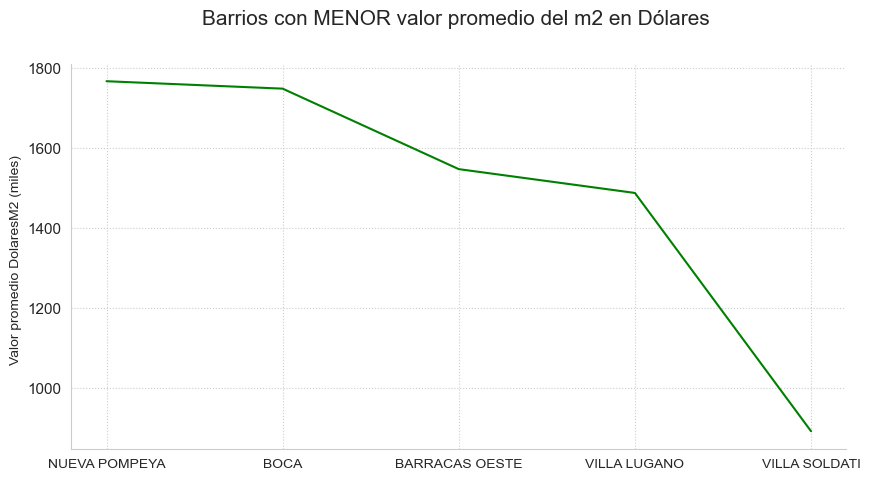

In [68]:
plt.figure(figsize=(10,5))
plt.title('Barrios con MENOR valor promedio del m2 en Dólares ', y=1.08, fontdict={'size':15})
plt.xticks(fontsize=10)
plt.yticks(fontsize=11)
plt.ylabel('Valor promedio DolaresM2 (miles)  ')
plt.xlabel(' ')

sns.lineplot(x = menor_promedio_dM2['Barrio'], y = menor_promedio_dM2['Promedio DolaresM2'], color='green', data = menor_promedio_dM2)
sns.set_style("whitegrid", {'grid.linestyle': ':'})
sns.despine()

plt.show()

## Barrios y cantidad de ambientes

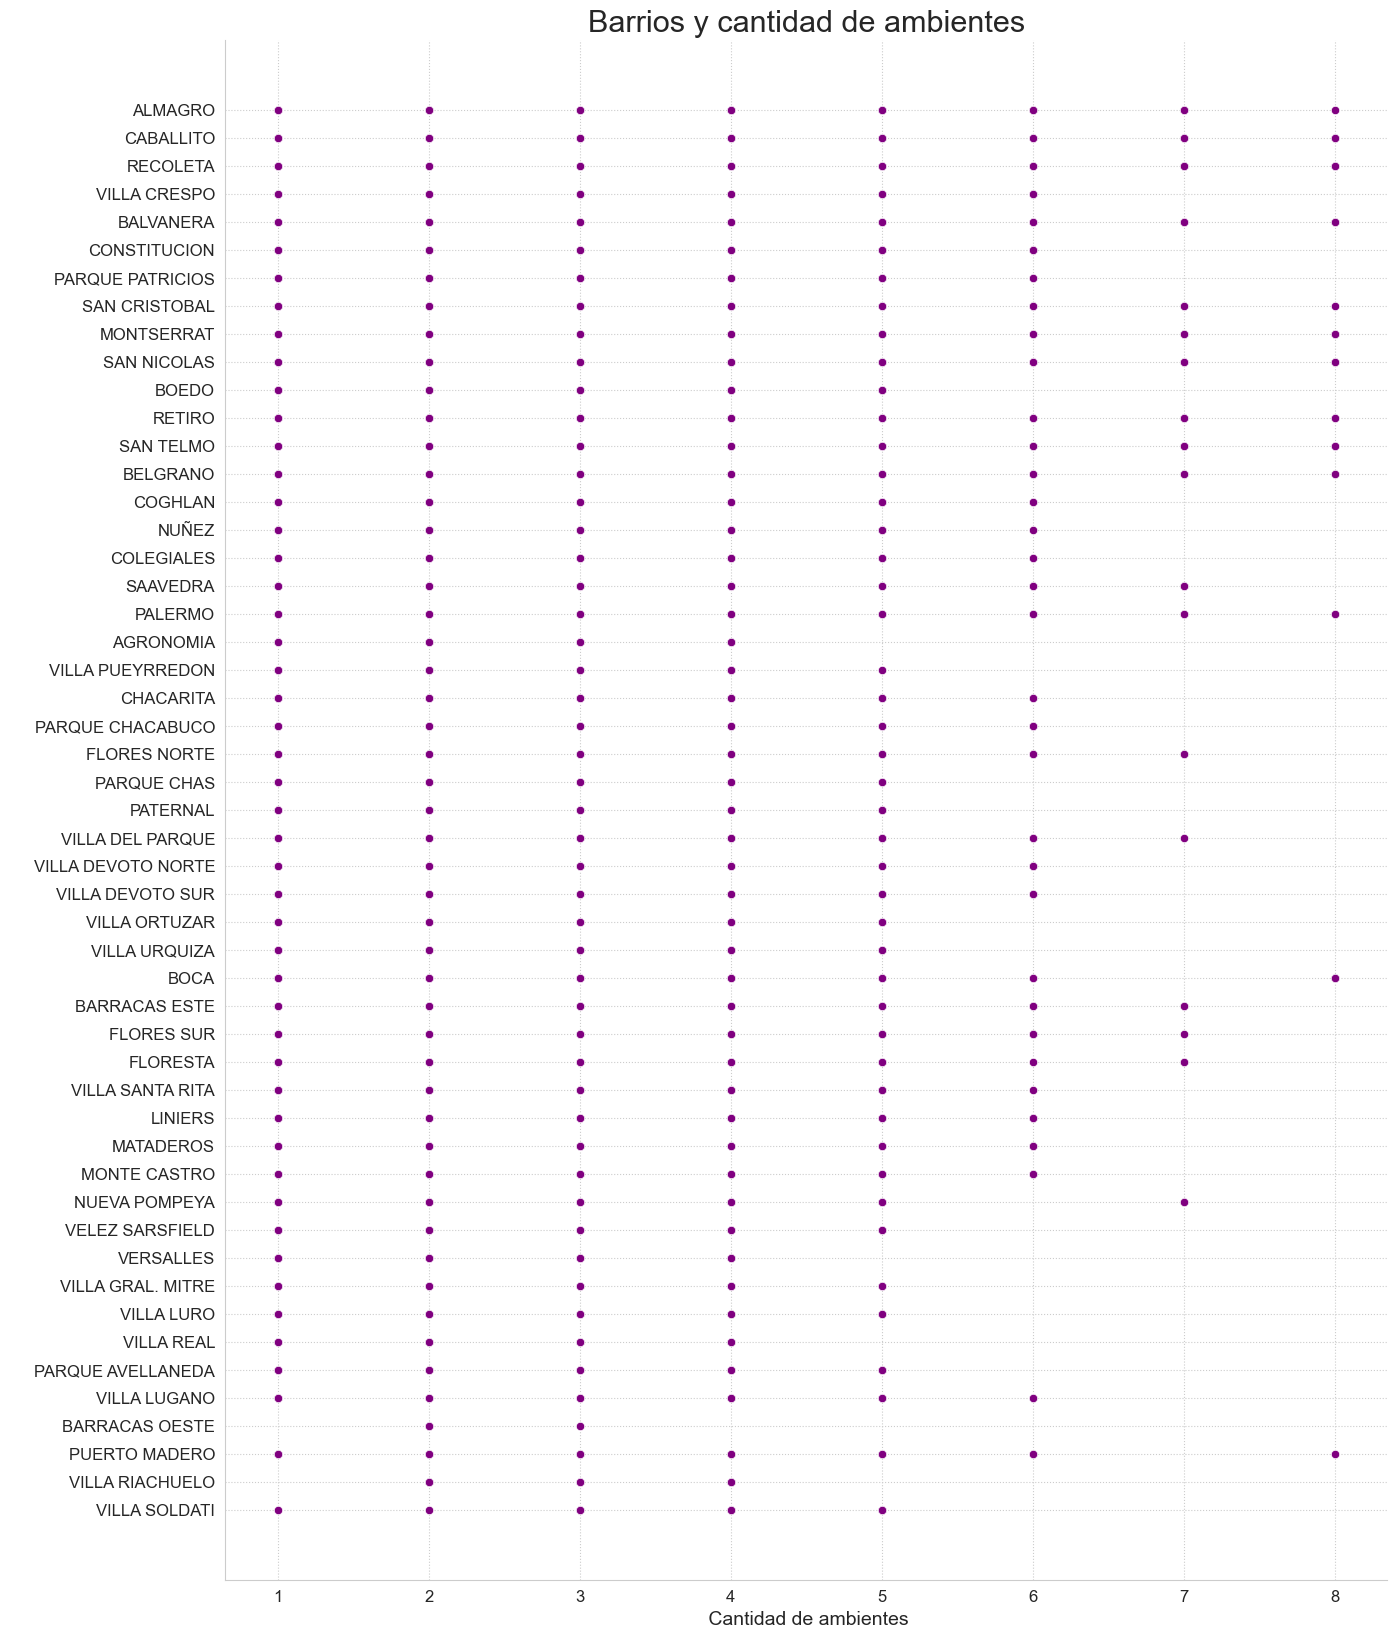

In [66]:
plt.figure(figsize=(15,20))

sns.scatterplot(y='Barrio', x='Ambientes', data=data, color='purple' )
sns.set_style("whitegrid", {'grid.linestyle': ':'})
sns.despine()

plt.title('Barrios y cantidad de ambientes', y=1, fontdict={'size':22})
plt.xlabel(' Cantidad de ambientes', fontdict={'size':14}, y=-0.01)
plt.xticks(fontsize=12)
plt.ylabel(' ', fontdict={'size':14} )
plt.yticks(fontsize=12)

plt.show()

## Cantidad de ambientes y rango de precios

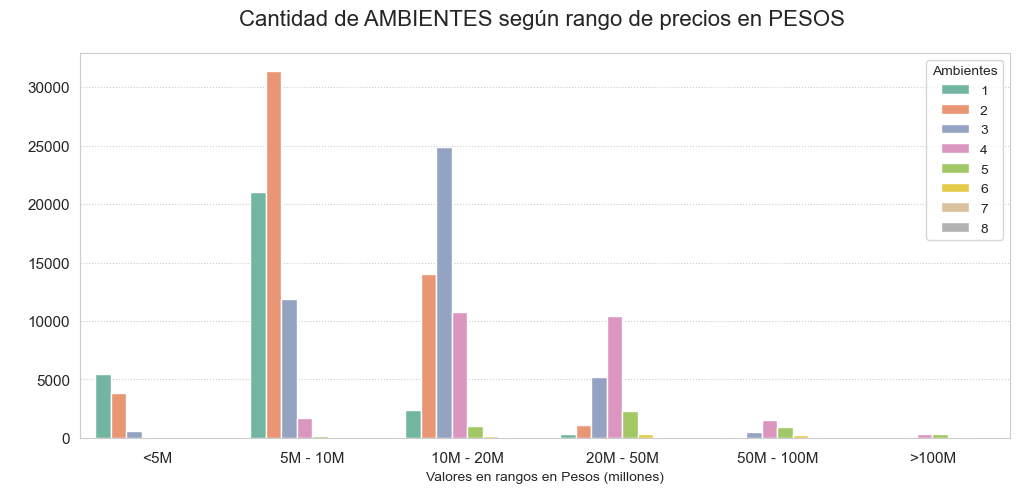

In [72]:
plt.figure(figsize=(12,5))
orden = ['<5M' ,'5M - 10M', '10M - 20M' , '20M - 50M', '50M - 100M', '>100M']

sns.countplot(x = 'Rango_Pesos', data = data, hue = 'Ambientes', order=orden, palette = 'Set2')

sns.set_style("whitegrid", {'grid.linestyle': ':'})

plt.title('Cantidad de AMBIENTES según rango de precios en PESOS ', y=1.05, fontdict={'size':16})
plt.xticks(fontsize=11, y=-0.01)
plt.yticks(fontsize=11)
plt.xlabel('Valores en rangos en Pesos (millones)')
plt.ylabel(' ')
plt.show()

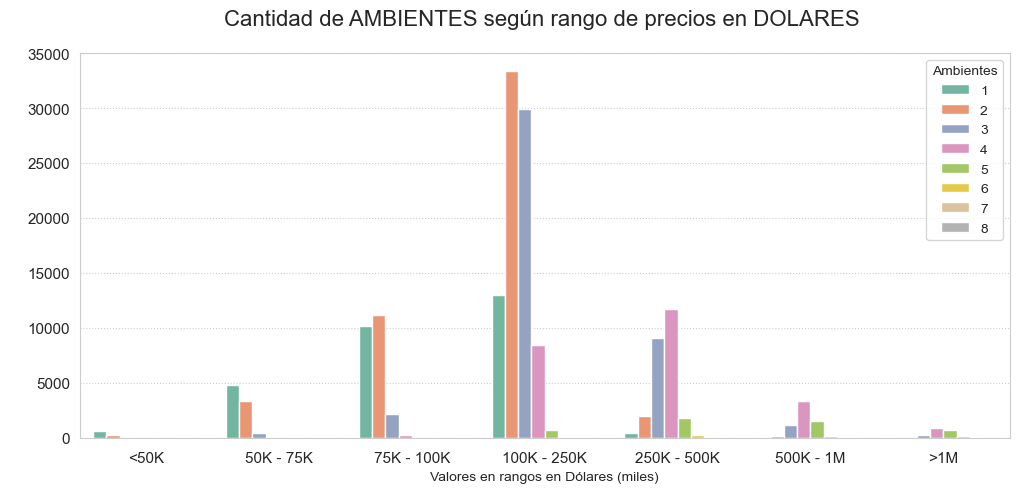

In [14]:
plt.figure(figsize=(12,5))
orden = ['<50K', '50K - 75K', '75K - 100K', '100K - 250K' ,  '250K - 500K' ,'500K - 1M', '>1M']

sns.countplot(x = 'Rango_Dolares', data = data, hue = 'Ambientes', order=orden, palette = 'Set2')

sns.set_style("whitegrid", {'grid.linestyle': ':'})

plt.title('Cantidad de AMBIENTES según rango de precios en DOLARES ', y=1.05, fontdict={'size':16})
plt.xticks(fontsize=11, y=-0.01)
plt.yticks(fontsize=11)
plt.xlabel('Valores en rangos en Dólares (miles)')
plt.ylabel(' ')
plt.show()

## Conclusiones:

- Los barrios con **mayores valores promedio del m2 en dólares** son, en primer lugar Puerto Madero con un promedio de 6600 dolaresM2 aprox y luego entre los barrios de Nuñez, Palermo, Belgrano y Recoleta con valores entre 3700 y 3300 dólaresM2.
- Los barrios con **menores valores promedio del m2 en dólares**  corresponden a los barrios de Villa Soldati, Villa Lugano, Barracas Oeste, La Boca y Nueva Pompeya y oscilan entre los 800 y 1750 dólaresM2.
<br>
- Podemos observar que barrios como Barracas Oeste y Villa Riachuelo no tienen departamentos de **1 ambiente**
- En todos los barrios hay departamentos de **2 y 3 ambientes**
- En el barrio de Barracas Oeste no hay departamentos de **4 ambientes**
- En los barrios de Villa Riachuelo, Barracas Oeste, Villa Real, Versalles y Agronomía no hay departamentos de **5 ambientes**
- Entre los **6, 7 y 8 ambientes** es mas variable la cantidad de barrios que tienen departamentos con esa cantidad de ambientes
<br>

- Se observa que en un rango de entre **5 y 10 millones de pesos** hay mayor cantidad de departamentos de **2 ambientes** (32.000 unidades aprox), seguido por aproximadamente 22.000 departamentos de **1 ambiente**. 
- En un rango de entre **10 y 20 millones de pesos** hay mayor predominancia de departamentos de **3 ambientes** (25.000 unidades), seguido por aprox 14.000 deptos de **2 ambientes** y 12.000 de **4 ambientes**. 
- En el rango de **20 y 50 millones de pesos** se observa una cantidad de departamentos de **4 ambientes** similar que en el rango anterior (11.000 unidades)


- La mayor conentración de departamentos se ubican en el rango entre **100 y 250 mil dólares**, con aproximadamente 33.000 unidades de **2 ambientes** y 30.000 de **3 ambientes**. Le siguen unas 13.000 unidades de **1 ambiente**.
- En un rango entre **250 mil y 500 mil dólares** la mayor cantidad de unidades tiene **4 ambientes** (12.000 departamentos aprox)
y hay menos de 2500 unidades con **2 ambientes**